Regan Alt 
Text Analytics 
Assignment 1 - March 12, 2021

## Problem 1 
### Your task is to analyze the dataset based on different text representation techniques to understand topic trend in 2016. 

In [1]:
# install add-on Natural Language Processing toolkit
# you only need to run it once in your device
!pip install nltk

In [2]:
import nltk
from nltk import FreqDist

#read file from local

#method 1
f = open('News_Article_2016_Jan.csv','rb')
raw = f.read()
raw = raw.decode('utf8') #decode raw text by utf-8


In [3]:
type (raw)

str

In [4]:
raw[:1000]

'Day,Name,Year,month,Content\r\n21,3D SYSTEMS,2016,January,"                                     Plastics News                                  Print Version                                  January 18, 2016  3-D printing and surgery a \'paradigm shift\'  BYLINE: Caroline Lewis  SECTION: Pg. 13 Vol. 27  LENGTH: 1608  words  DATELINE: New York   Zeesy Stern lay unconscious on an operating table at New York University Langone Medical Center as a surgeon removed a section of her jaw where a golf-ball-size tumor had begun to displace the teeth on the left side of her mouth. Another doctor, meanwhile, worked to extract a piece of her fibula that would be fitted like a puzzle piece into the space where her jaw once was.  The goal was to remove the growth and create a new, fully functioning jaw, a feat that once took three operations over 18 months and left some patients with trouble chewing and disfigurement. But the doctors at NYU Langone had pioneered a new approach, one they dubbed ""jaw 

In [5]:
raw = raw.replace('\n',' ') #put space in text

## 1)	Use a simple bag-of-words approach

In [6]:
tokens = nltk.word_tokenize(raw) #gets everything other than the space
type(tokens)

list

In [7]:
#change all tokens into lower case 
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

In [8]:
#generate a frequency dictionary for all tokens 
freq = FreqDist(words2)

#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq[:30]
#most of these are stop words

[('the', 684376),
 ('of', 370670),
 ('and', 336165),
 ('to', 332464),
 ('a', 247592),
 ('in', 246858),
 ('for', 145414),
 ('that', 117682),
 ('is', 103809),
 ('on', 95619),
 ('at', 86097),
 ('with', 82374),
 ('as', 71591),
 ('by', 69941),
 ('january', 67917),
 ('it', 62941),
 ('be', 57138),
 ('from', 53124),
 ('was', 52913),
 ('or', 51824),
 ('are', 50048),
 ('said', 47691),
 ('has', 47137),
 ('will', 46926),
 ('this', 45607),
 ('an', 44527),
 ('not', 41016),
 ('company', 38995),
 ('have', 38879),
 ('its', 37688)]

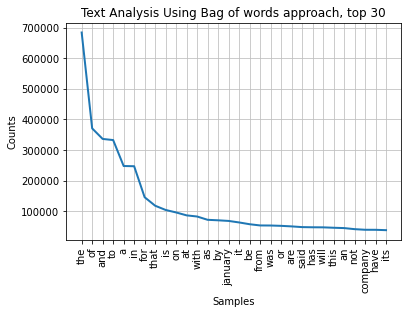

In [9]:
#If the this code does not show a figure, just try to run it twice
freq.plot(30, title="Text Analysis Using Bag of words approach, top 30")

## 2)	Use a bag-of-words approach with stemming and stop words removal 

### stop words removal

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\altre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english') #use the NLTK stopwords

In [12]:
#only keep the words that not in nltk stopwords word list
words_nostopwords = [w for w in words2 if w not in stopwords]

### Porter Stemmer

In [13]:
#Use Porter Stemmer on the non stop words data
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words_nostopwords]

#Get the frequency distribution 
freq1 = FreqDist(stem1)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1[:30]

[('januari', 67917),
 ('compani', 49390),
 ('said', 47691),
 ('year', 34984),
 ('servic', 33275),
 ('new', 31407),
 ('market', 30206),
 ('right', 24448),
 ('ca', 23274),
 ('also', 23097),
 ('state', 22674),
 ('provid', 21208),
 ('includ', 21026),
 ('word', 20978),
 ('time', 20868),
 ('languag', 20628),
 ('busi', 20601),
 ('would', 20422),
 ('english', 20354),
 ('length', 19998),
 ('copyright', 19824),
 ('reserv', 19519),
 ('file', 19294),
 ('one', 19236),
 ('million', 18840),
 ('news', 18290),
 ('energi', 18179),
 ('use', 18037),
 ('public', 17957),
 ('report', 17522)]

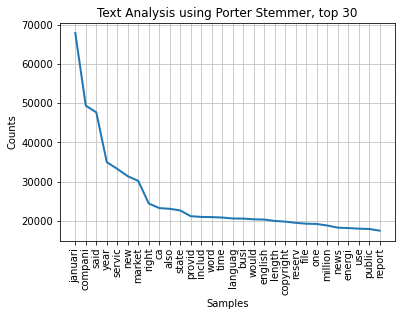

In [14]:
freq1.plot(30, title="Text Analysis using Porter Stemmer, top 30")

### WordNet Lemmatizer

In [15]:
#Steps are the same with the previous two stemmers 
lancaster = nltk.LancasterStemmer()
wnl = nltk.WordNetLemmatizer()
stem3 = [lancaster.stem(w) for w in words_nostopwords] # use data without stopwords
stem3 = [w for w in stem3]
freq3 = FreqDist(stem3)
sorted_freq3 = sorted(freq3.items(),key = lambda k: k[1], reverse = True)

In [16]:
sorted_freq3[:30]

[('janu', 67918),
 ('new', 50399),
 ('company', 49390),
 ('said', 47696),
 ('serv', 39436),
 ('us', 36755),
 ('year', 35091),
 ('stat', 34336),
 ('off', 31257),
 ('market', 30206),
 ('right', 24486),
 ('op', 23739),
 ('provid', 23386),
 ('act', 23358),
 ('ca', 23217),
 ('also', 23097),
 ('mil', 23020),
 ('publ', 22358),
 ('fin', 22190),
 ('tim', 21950),
 ('includ', 21490),
 ('commit', 21300),
 ('word', 21014),
 ('fil', 20657),
 ('langu', 20630),
 ('busy', 20626),
 ('produc', 20522),
 ('would', 20424),
 ('engl', 20365),
 ('leng', 19935)]

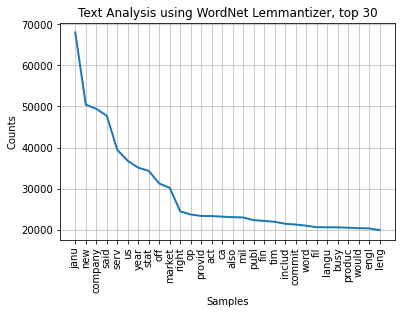

In [17]:
freq3.plot(30, title="Text Analysis using WordNet Lemmantizer, top 30")

### 3)	Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS)

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\altre\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'

#Generate a list of POS tags
POS_tag_list = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]

In [42]:
#Generate a frequency distribution of all the POS tags
tag_freq = nltk.FreqDist(POS_tag_list)
#Sort the result 
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)

In [43]:
POS_tag_list #proper nouns

[('Charleston', 'NNP'),
 ('Gazette-Mail', 'NNP'),
 ('January', 'NNP'),
 ('Friday', 'NNP'),
 ('Sausage', 'NNP'),
 ('lovers', 'NNS'),
 ('ground', 'NN'),
 ('hog', 'NN'),
 ('Rock', 'NNP'),
 ('Cave', 'NNP'),
 ('grocer', 'NN'),
 ("'Ground", 'NNP'),
 ('Hog', 'NNP'),
 ('day', 'NN'),
 ('BYLINE', 'NNP'),
 ('Dawn', 'NN'),
 ('Nolan', 'NNP'),
 ('Staff', 'NNP'),
 ('writer', 'NN'),
 ('SECTION', 'NN'),
 ('LIFE', 'NNP'),
 ('Pg', 'NNP'),
 ('P1D', 'NNP'),
 ('LENGTH', 'NNP'),
 ('words', 'NNS'),
 ('Glen', 'NNP'),
 ('Hawkins', 'NNP'),
 ('groundhog', 'NN'),
 ('hat', 'NN'),
 ('coffee', 'NN'),
 ('cup', 'NN'),
 ('proclaim', 'NN'),
 ('mail', 'NN'),
 ('gear', 'NN'),
 ('gift', 'NN'),
 ('relative', 'NN'),
 ('back', 'NN'),
 ('IGA', 'NNP'),
 ('grocery', 'NN'),
 ('story', 'NN'),
 ('Rock', 'NNP'),
 ('Cave', 'NNP'),
 ('stuffed', 'NN'),
 ('groundhog', 'NN'),
 ('direction', 'NN'),
 ('top', 'NN'),
 ('refrigerator', 'NN'),
 ('case', 'NN'),
 ('room', 'NN'),
 ('images', 'NNS'),
 ('critters', 'NNS'),
 ('store', 'NN'),
 ('websi

In [44]:
sorted_tag_freq[:30]

[(('Hawkins', 'NNP'), 44),
 (('sausage', 'NN'), 30),
 (('sale', 'NN'), 28),
 (('pounds', 'NNS'), 28),
 (('ground', 'NN'), 26),
 (('Rock', 'NNP'), 22),
 (('Cave', 'NNP'), 22),
 (('year', 'NN'), 22),
 (('Mumbai', 'NNP'), 20),
 (('Hog', 'NNP'), 18),
 (('deposits', 'NNS'), 18),
 (('crore', 'NN'), 18),
 (('IGA', 'NNP'), 16),
 (('Ground', 'NNP'), 16),
 (('pork', 'NN'), 16),
 (('day', 'NN'), 12),
 (('week', 'NN'), 12),
 (('start', 'NN'), 12),
 (('Wednesday', 'NNP'), 12),
 (('words', 'NNS'), 10),
 (('Glen', 'NNP'), 10),
 (('groundhog', 'NN'), 10),
 (('orders', 'NNS'), 10),
 (('January', 'NNP'), 8),
 (('store', 'NN'), 8),
 (('years', 'NNS'), 8),
 (('time', 'NN'), 8),
 (('Delhi', 'NNP'), 8),
 (('city', 'NN'), 8),
 (('Rs', 'NNP'), 8)]

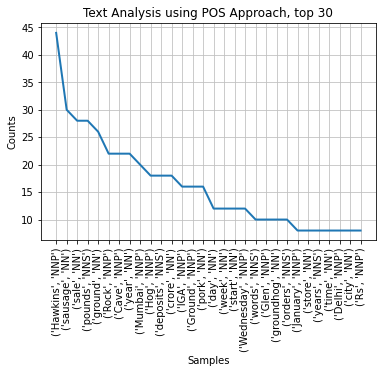

In [45]:
tag_freq.plot(30, title="Text Analysis using POS Approach, top 30")

### 4)	Use POS approach and only focus on NNP 

[(('Hawkins', 'NNP'), 44), (('Rock', 'NNP'), 22), (('Cave', 'NNP'), 22), (('Mumbai', 'NNP'), 20), (('Hog', 'NNP'), 18), (('IGA', 'NNP'), 16), (('Ground', 'NNP'), 16), (('Wednesday', 'NNP'), 12), (('Glen', 'NNP'), 10), (('January', 'NNP'), 8), (('Delhi', 'NNP'), 8), (('Rs', 'NNP'), 8), (('Sausage', 'NNP'), 6), (('Groundhog', 'NNP'), 6), (('County', 'NNP'), 6), (('Saturday', 'NNP'), 6), (('Bank', 'NNP'), 6), (('Charleston', 'NNP'), 4), (('Gazette-Mail', 'NNP'), 4), (('Nolan', 'NNP'), 4), (('LENGTH', 'NNP'), 4), (('Day', 'NNP'), 4), (('State', 'NNP'), 4), (('Upshur', 'NNP'), 4), (('Wes', 'NNP'), 4), (('@', 'NNP'), 4), (('Newspaper', 'NNP'), 4), (('Copyright', 'NNP'), 4), (('Indian', 'NNP'), 4), (('Express', 'NNP'), 4)]


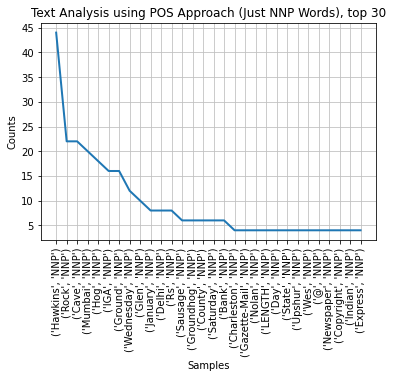

In [46]:
#Generate a list of POS tags, onlyrake NNP tags
POS_tag_list2 = [(word,tag) for (word,tag) in POS_tags if tag == 'NNP']

#Generate a frequency distribution of all the POS tags
tag_freq = nltk.FreqDist(POS_tag_list2)
#Sort the result 
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)

print(sorted_tag_freq[:30])

tag_freq.plot(30, title="Text Analysis using POS Approach (Just NNP Words), top 30")

# Problem 2 
### Pick 2 companies preferably from the same sector of interest (try to pick companies with more data points, an example can be Microsoft and IBM). Perform topic trend analysis using the text representative method of your choice. 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file into data
data_raw = pd.read_csv('News_Article_2016_Jan.csv')

In [48]:
# calculate word count of 
data_raw["Name"].value_counts()

NETFLIX                   123
HNI                       106
HAWKINS                    98
AMERICAN INTERNATIONAL     88
GRIFFON                    84
                         ... 
TELEDYNE TECHNOLOGIES       1
FRANCESCAS HOLDINGS         1
U S SILICA HOLDINGS         1
DYCOM INDUSTRIES            1
STANDEX INTERNATIONAL       1
Name: Name, Length: 1234, dtype: int64

Analyzing HNI and Hawkings as the companies, because they both appear frequently in the month of January and both are in the furniture home decor/manufacturing businss.

In [49]:
# reduce data to only the articles regardin these to companies
data_red = data_raw.loc[data_raw["Name"].isin(["HNI", "HAWKINS"])]

In [50]:
data_red

,Day,Name,Year,month,Content
7257,6,HAWKINS,2016,January,Chicago Daily...
7258,7,HAWKINS,2016,January,Progressive Media ...
7259,7,HAWKINS,2016,January,Star Tribune (Minn...
7260,7,HAWKINS,2016,January,Progressive Media ...
7261,5,HAWKINS,2016,January,Star Tribune (Minn...
...,...,...,...,...,...
10535,8,HNI,2016,January,Economic Times (E-P...
10536,8,HNI,2016,January,Economic Times (E-P...
10537,14,HNI,2016,January,Economic Times (E-P...
10538,21,HNI,2016,January,Economic Times (E-P...


In [51]:
# do bag of words with stop word removal, for each week in the dataset
# weeks are defined as the days in 7*i+1 until 7*i + 7 
# saved everyhing in a dictionary weekly_wordcount = {}
weekly_wordcount = {}
N = 10 # the top N-words to save for each week
for i in range(5):
    # filter data to only articles in this week
    data_week = data_red.loc[(data_red["Day"] >= 7*i+1) & (data_red["Day"] <= 7*i+7)]
    # perform bag of words with stop word removal for the Content of the news article
    week_content = " ".join(data_week["Content"].tolist())
    # print(week_content[:100])
    tokens = nltk.word_tokenize(week_content) # tokenize into words - bag of words approach?
    #change all tokens into lower case 
    words = [w.lower() for w in tokens]   #list comprehension 
    #only keep text words, no numbers 
    words = [w for w in words if w.isalpha()]
    # remove stopwords, same as above Problem 1
    words = [w for w in words if w not in stopwords] 
    
    ### How to get only top N-Words for each week from HNI and Hawkins
    POS_tags = nltk.pos_tag(tokens) 
    #Generate a list of POS tags
    POS_tag_list = [(words,tag) for (words,tag) in POS_tags if tag.startswith('N')]
    #Generate a frequency distribution of all the POS tags
    tag_freq = nltk.FreqDist(POS_tag_list)
    #Sort the result 
    sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
    #Sort the result 
    POS_tag_list #all nouns
    weekly_wordcount[f"Week{i+1}"] = sorted_tag_freq[:N]

In [52]:
weekly_wordcount["Week1"]

[(('Hawkins', 'NNP'), 434),
 (('Wheaton', 'NNP'), 192),
 (('College', 'NNP'), 180),
 (('college', 'NN'), 108),
 (('Muslims', 'NNP'), 104),
 (('Larycia', 'NNP'), 92),
 (('Chicago', 'NNP'), 88),
 (('January', 'NNP'), 88),
 (('%', 'NN'), 80),
 (('Wednesday', 'NNP'), 78)]

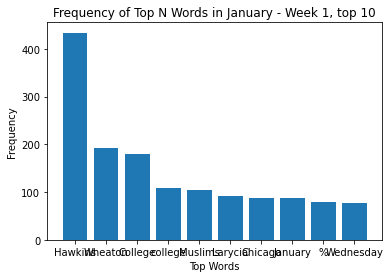

In [62]:
Week1_Words = ['Hawkins', 'Wheaton', 'College', 'college', 'Muslims', 'Larycia', 'Chicago', 'January', '%', 'Wednesday']
Frequency = [434, 192, 180, 108, 104, 92, 88, 88, 80, 78]

plt.bar(Week1_Words,Frequency)
plt.title('Frequency of Top N Words in January - Week 1, top 10')
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.show()

In [54]:
weekly_wordcount["Week2"]

[(('%', 'NN'), 176),
 (('Hawkins', 'NNP'), 172),
 (('investors', 'NNS'), 166),
 (('January', 'NNP'), 124),
 (('bonds', 'NNS'), 110),
 (('issue', 'NN'), 86),
 (('fund', 'NN'), 80),
 (('times', 'NNS'), 76),
 (('bond', 'NN'), 74),
 (('years', 'NNS'), 70)]

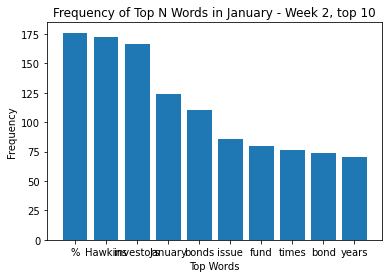

In [63]:
Week2_Words = ['%', 'Hawkins', 'investors', 'January', 'bonds', 'issue', 'fund', 'times', 'bond', 'years']
Frequency2 = [176, 172, 166, 124, 110, 86, 80, 76, 74, 70]

plt.bar(Week2_Words,Frequency2)
plt.title('Frequency of Top N Words in January - Week 2, top 10')
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.show()

In [56]:
weekly_wordcount["Week3"]

[(('Hawkins', 'NNP'), 218),
 (('January', 'NNP'), 124),
 (('%', 'NN'), 112),
 (('time', 'NN'), 76),
 (('India', 'NNP'), 74),
 (('office', 'NN'), 72),
 (('college', 'NN'), 68),
 (('year', 'NN'), 68),
 (("O'Sullivan", 'NNP'), 68),
 (('Wheaton', 'NNP'), 62)]

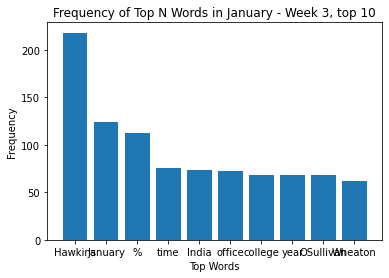

In [64]:
Week3_Words = ['Hawkins', 'January', '%', 'time', 'India', 'office', 'college', 'year', 'OSullivan', 'Wheaton']
Frequency3 = [218, 124, 112, 76, 74, 72, 68, 68, 68, 62]

plt.bar(Week3_Words,Frequency3)
plt.title('Frequency of Top N Words in January - Week 3, top 10')
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.show()

In [58]:
weekly_wordcount["Week4"]

[(('%', 'NN'), 258),
 (('folios', 'NNS'), 212),
 (('crore', 'NN'), 144),
 (('quarter', 'NN'), 134),
 (('funds', 'NNS'), 118),
 (('lakh', 'NN'), 112),
 (('January', 'NNP'), 102),
 (('Rs', 'NNP'), 92),
 (('investor', 'NN'), 90),
 (('share', 'NN'), 72)]

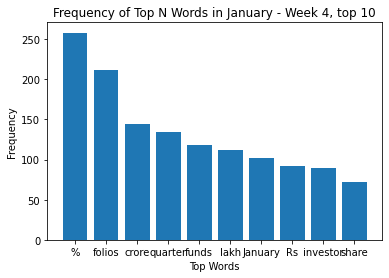

In [65]:
Week4_Words = ['%', 'folios', 'crore', 'quarter', 'funds', 'lakh', 'January', 'Rs', 'investor', 'share']
Frequency4 = [258, 212, 144, 134, 118, 112, 102, 92, 90, 72]

plt.bar(Week4_Words,Frequency4)
plt.title('Frequency of Top N Words in January - Week 4, top 10')
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.show()

In [60]:
 weekly_wordcount["Week5"]

[(('Hawkins', 'NNP'), 44),
 (('sausage', 'NN'), 30),
 (('sale', 'NN'), 28),
 (('pounds', 'NNS'), 28),
 (('ground', 'NN'), 26),
 (('Rock', 'NNP'), 22),
 (('Cave', 'NNP'), 22),
 (('year', 'NN'), 22),
 (('Mumbai', 'NNP'), 20),
 (('Hog', 'NNP'), 18)]

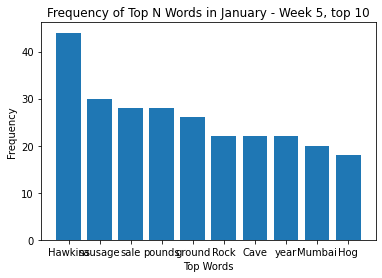

In [68]:
Week5_Words = ['Hawkins', 'sausage', 'sale', 'pounds', 'ground', 'Rock', 'Cave', 'year', 'Mumbai', 'Hog']
Frequency5 = [44, 30, 28, 28, 26, 22, 22, 22, 20, 18]

plt.bar(Week5_Words,Frequency5)
plt.title('Frequency of Top N Words in January - Week 5, top 10')
plt.xlabel('Top Words')
plt.ylabel('Frequency')
plt.show()